## Exploring Carribean images

In [703]:
import os
import pandas as pd
import numpy as np
import cv2
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import time
%matplotlib inline

train_path = "C:/Users/Mark/geo_py37/all_carribean_images/training/"
validation_path = "C:/Users/Mark/geo_py37/all_carribean_images/validation/"
test_path = "C:/Users/Mark/geo_py37/all_carribean_images/testing/"

def img_set_load(data_path, img_path):
    data = pd.read_csv(data_path)
    data["id"] = img_path + data.id.astype(str) + ".png"
    return data

train_labels = img_set_load(data_path = "train_labels.csv", img_path = train_path)
validation_labels = img_set_load(data_path = "validation_labels.csv", img_path = validation_path)
test_labels = img_set_load(data_path = "submission_format.csv", img_path = test_path)
test_labels["verified"] = True
test_labels["unknown"] = 1

pd.concat([train_labels.head(3), validation_labels.head(3), test_labels.head(3)], axis = 0, sort = False)

id  verified  \
0  C:/Users/Mark/geo_py37/all_carribean_images/tr...      True   
1  C:/Users/Mark/geo_py37/all_carribean_images/tr...      True   
2  C:/Users/Mark/geo_py37/all_carribean_images/tr...      True   
0  C:/Users/Mark/geo_py37/all_carribean_images/va...      True   
1  C:/Users/Mark/geo_py37/all_carribean_images/va...      True   
2  C:/Users/Mark/geo_py37/all_carribean_images/va...      True   
0  C:/Users/Mark/geo_py37/all_carribean_images/te...      True   
1  C:/Users/Mark/geo_py37/all_carribean_images/te...      True   
2  C:/Users/Mark/geo_py37/all_carribean_images/te...      True   

   concrete_cement  healthy_metal  incomplete  irregular_metal  other  unknown  
0              1.0            0.0         0.0              0.0    0.0      NaN  
1              0.0            0.0         0.0              1.0    0.0      NaN  
2              0.0            1.0         0.0              0.0    0.0      NaN  
0              0.0            1.0         0.0              0.0    0.0      NaN  
1              0.0            1.0         0.0              0.0    0.0      NaN  
2              0.0            1.0         0.0              0.0    0.0      NaN  
0              0.9            0.0         0.0              0.0    0.0      1.0  
1              0.9            0.0         0.0              0.0    0.0      1.0  
2              0.9            0.0         0.0              0.0    0.0      1.0

In [727]:
def roof_type_extract(data):
    data["index"] = data.index
    labels = data.melt(id_vars = ["index", "id", "verified"])
    labels = labels[labels.value == 1].drop(["value"], axis = 1)
    labels.sort_values(["index"], inplace = True)
    labels = labels[["verified", "variable"]]
    labels.reset_index(inplace = True)
    
    return labels

train_roof_labels = roof_type_extract(data = train_labels)
val_roof_labels = roof_type_extract(data = validation_labels)
test_roof_labels = roof_type_extract(data = test_labels)

### Loading and plotting images

In [356]:
train_imgs = [cv2.imread(train_labels.id[i]) for i in range(len(train_labels))]
validation_imgs = [cv2.imread(validation_labels.id[i]) for i in range(len(validation_labels))]
test_imgs = [cv2.imread(test_labels.id[i]) for i in range(len(test_labels))]

In [750]:
def grid_img_plot(data, labels, class_n):
    unique_types = np.unique(labels.variable)
    fig, axs = plt.subplots(len(unique_types), class_n, figsize = (25, 16))
    axs = axs.ravel()
    pos = 0
    
    for i in range(len(unique_types)):
        labs = labels[labels.variable == unique_types[i]]
        idx = sample(list(labs.index), class_n)
        flag = list(labels.verified.iloc[idx])
        imgs = [data[i] for i in idx]
        
        for j in range(len(imgs)):
            plt.tight_layout()
            axs[pos].imshow(imgs[j])
            axs[pos].set_title("Roof: {} \n Dim: {}, {} \n Idx: {} \n Verified: {}".format(unique_types[i], 
                                                                                           imgs[j].shape[0], 
                                                                                           imgs[j].shape[1],
                                                                                           idx[j],
                                                                                           flag[j]))
            pos += 1

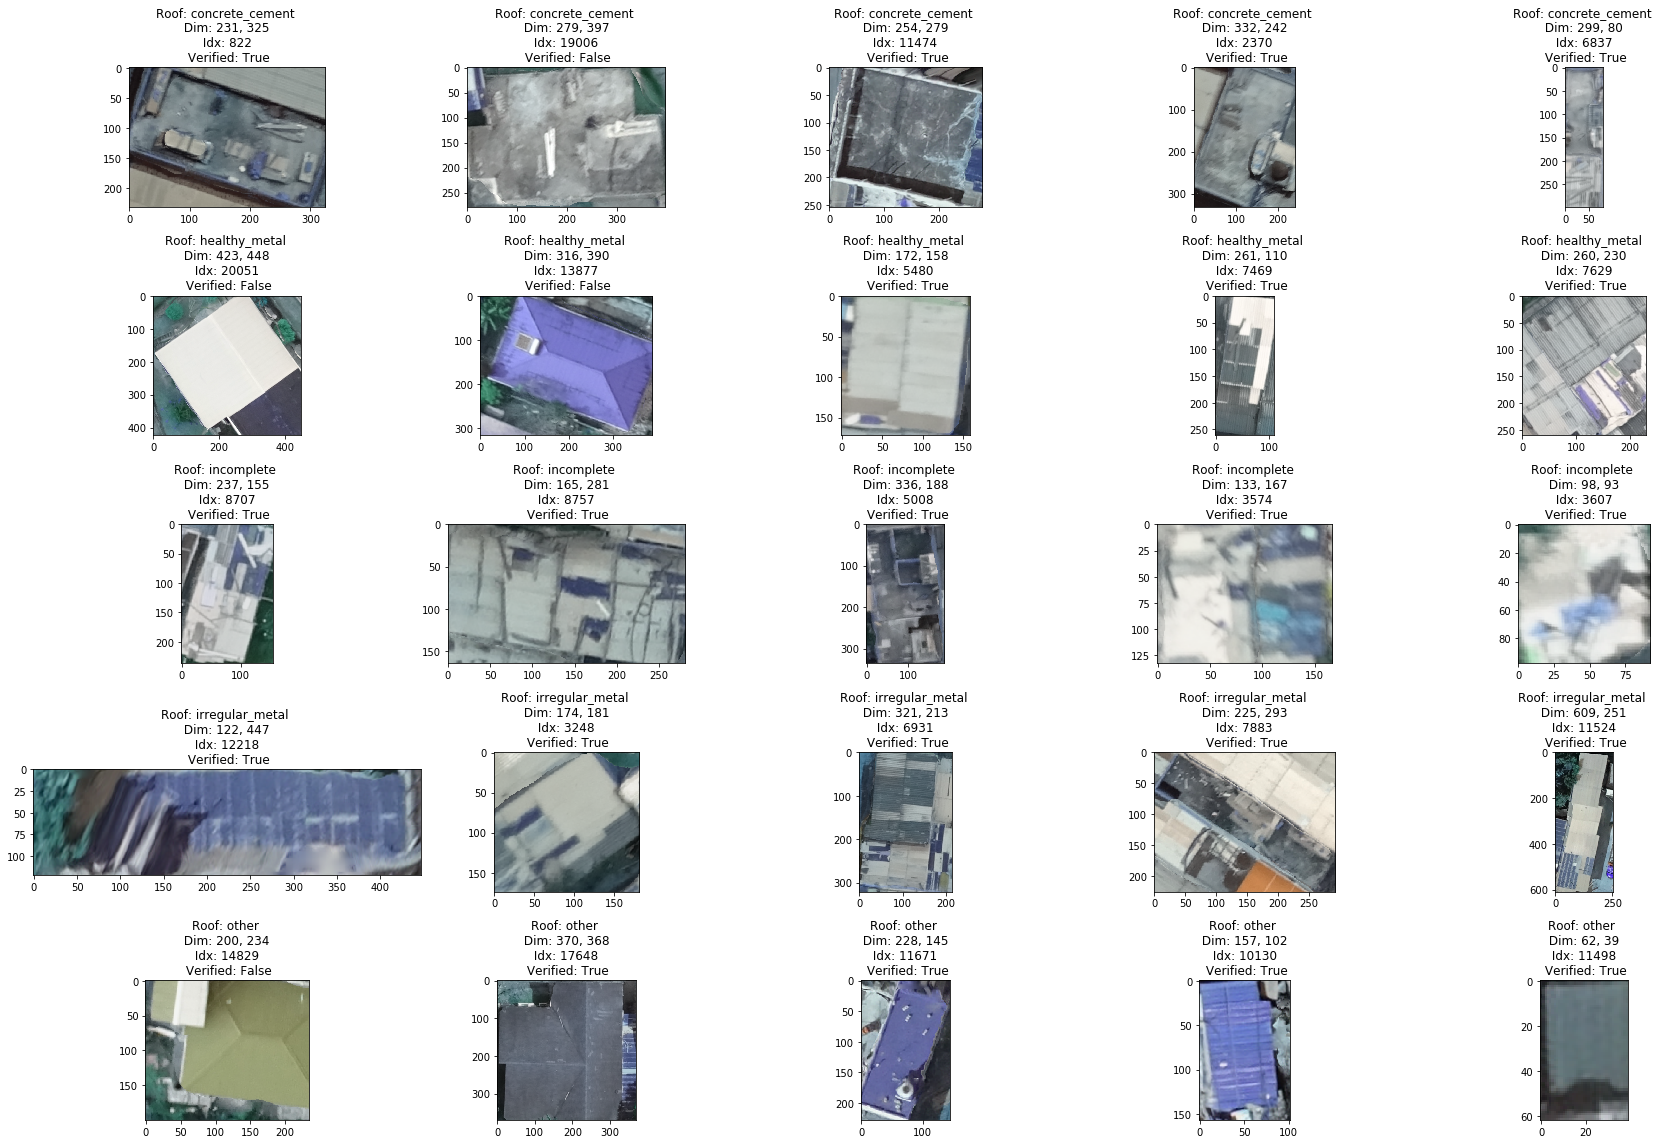

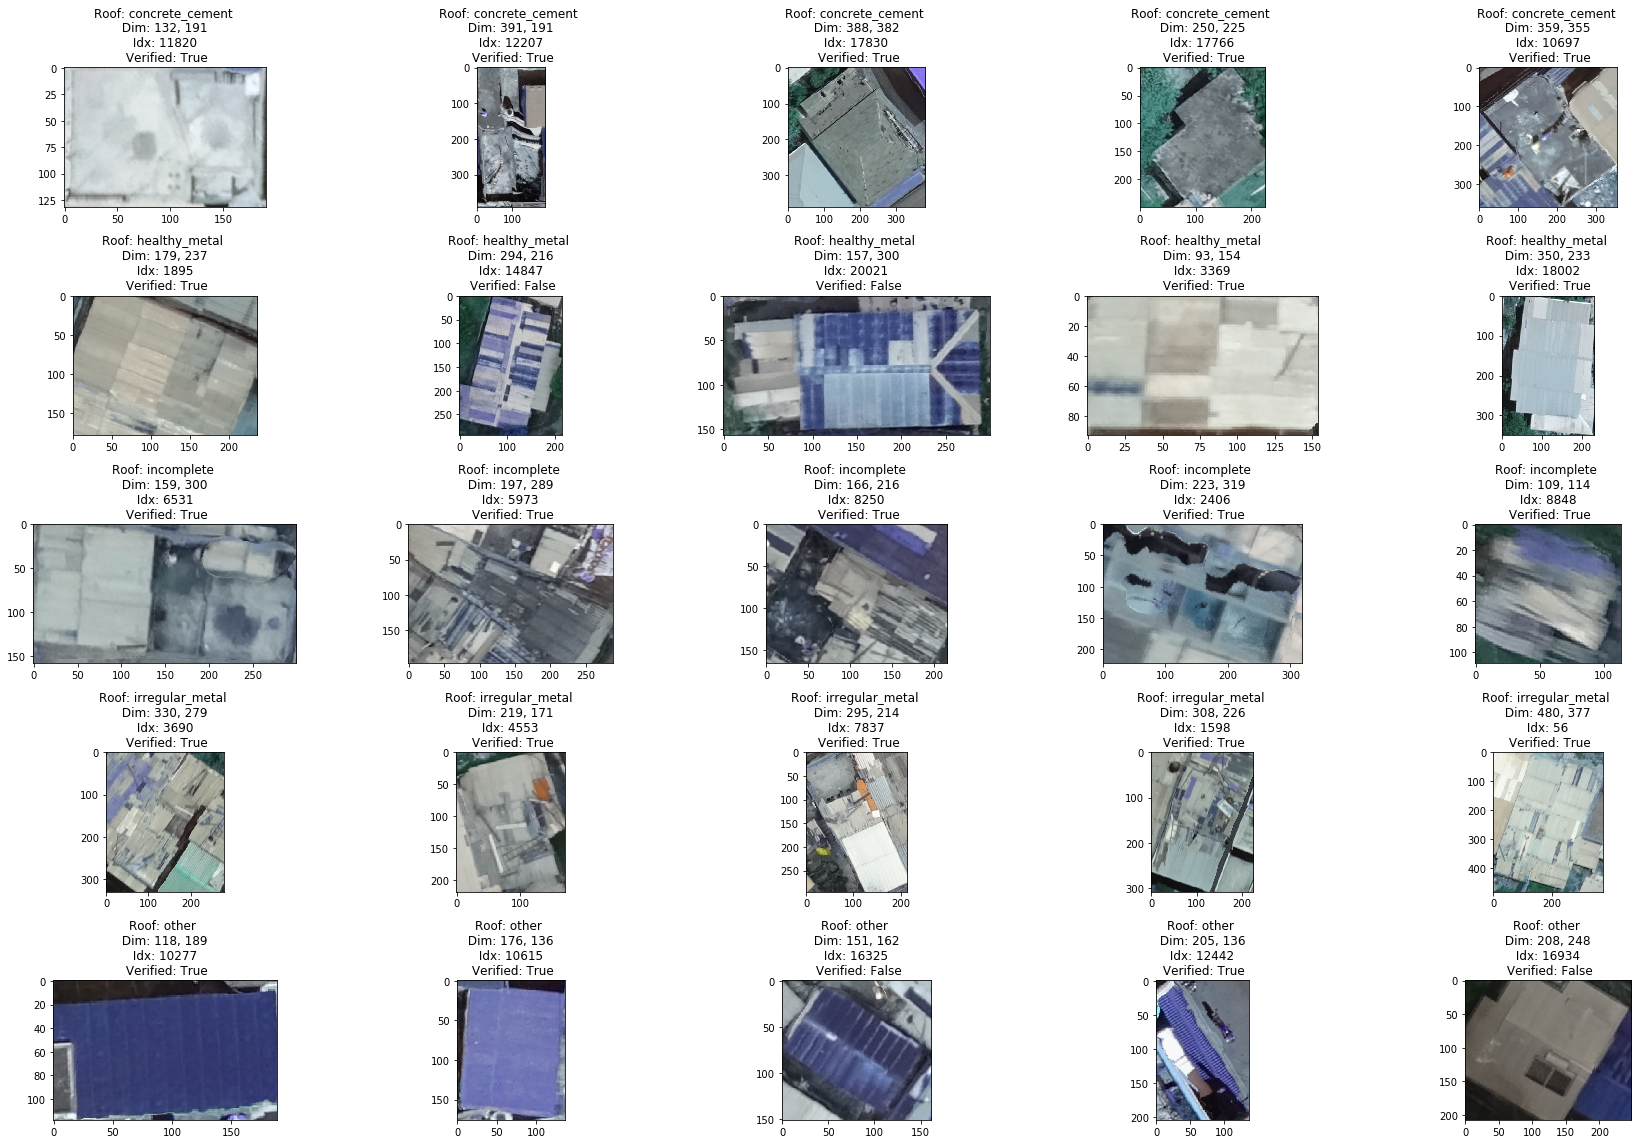

In [755]:
for _ in range(2):
    grid_img_plot(data = train_imgs, labels = train_roof_labels, class_n = 5)

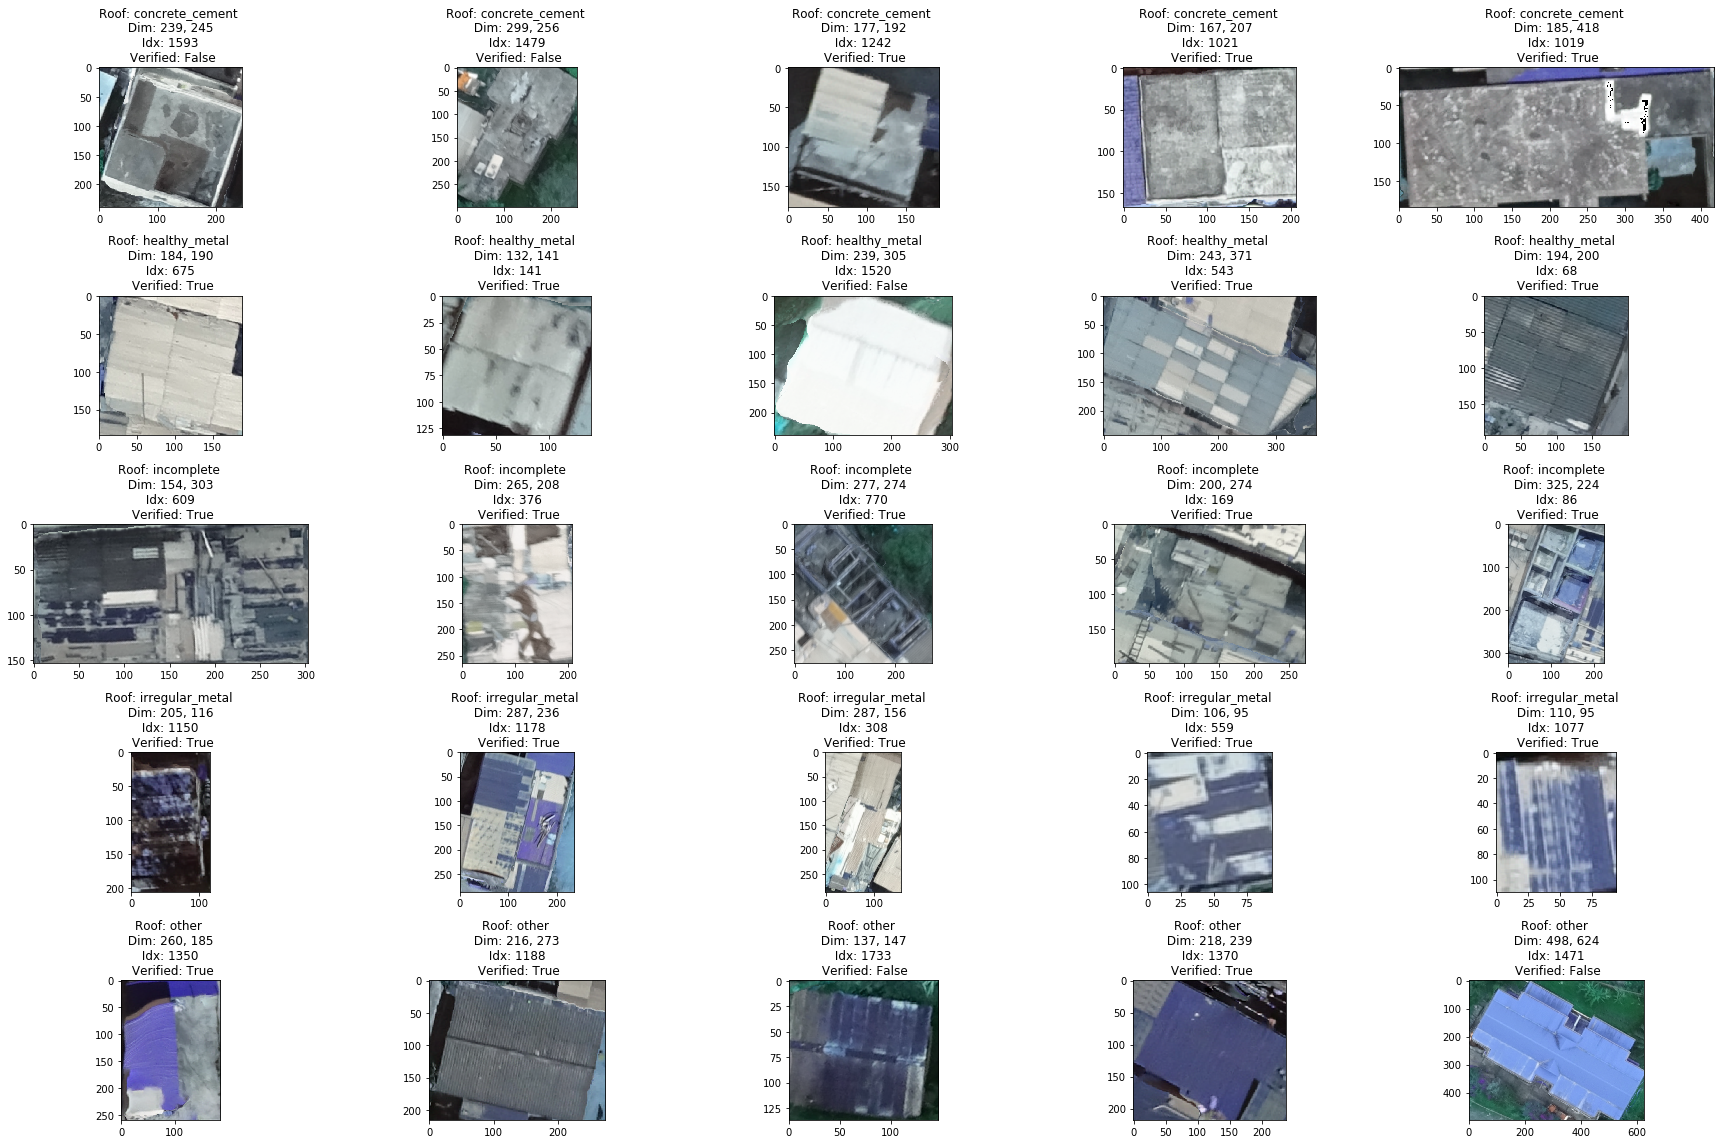

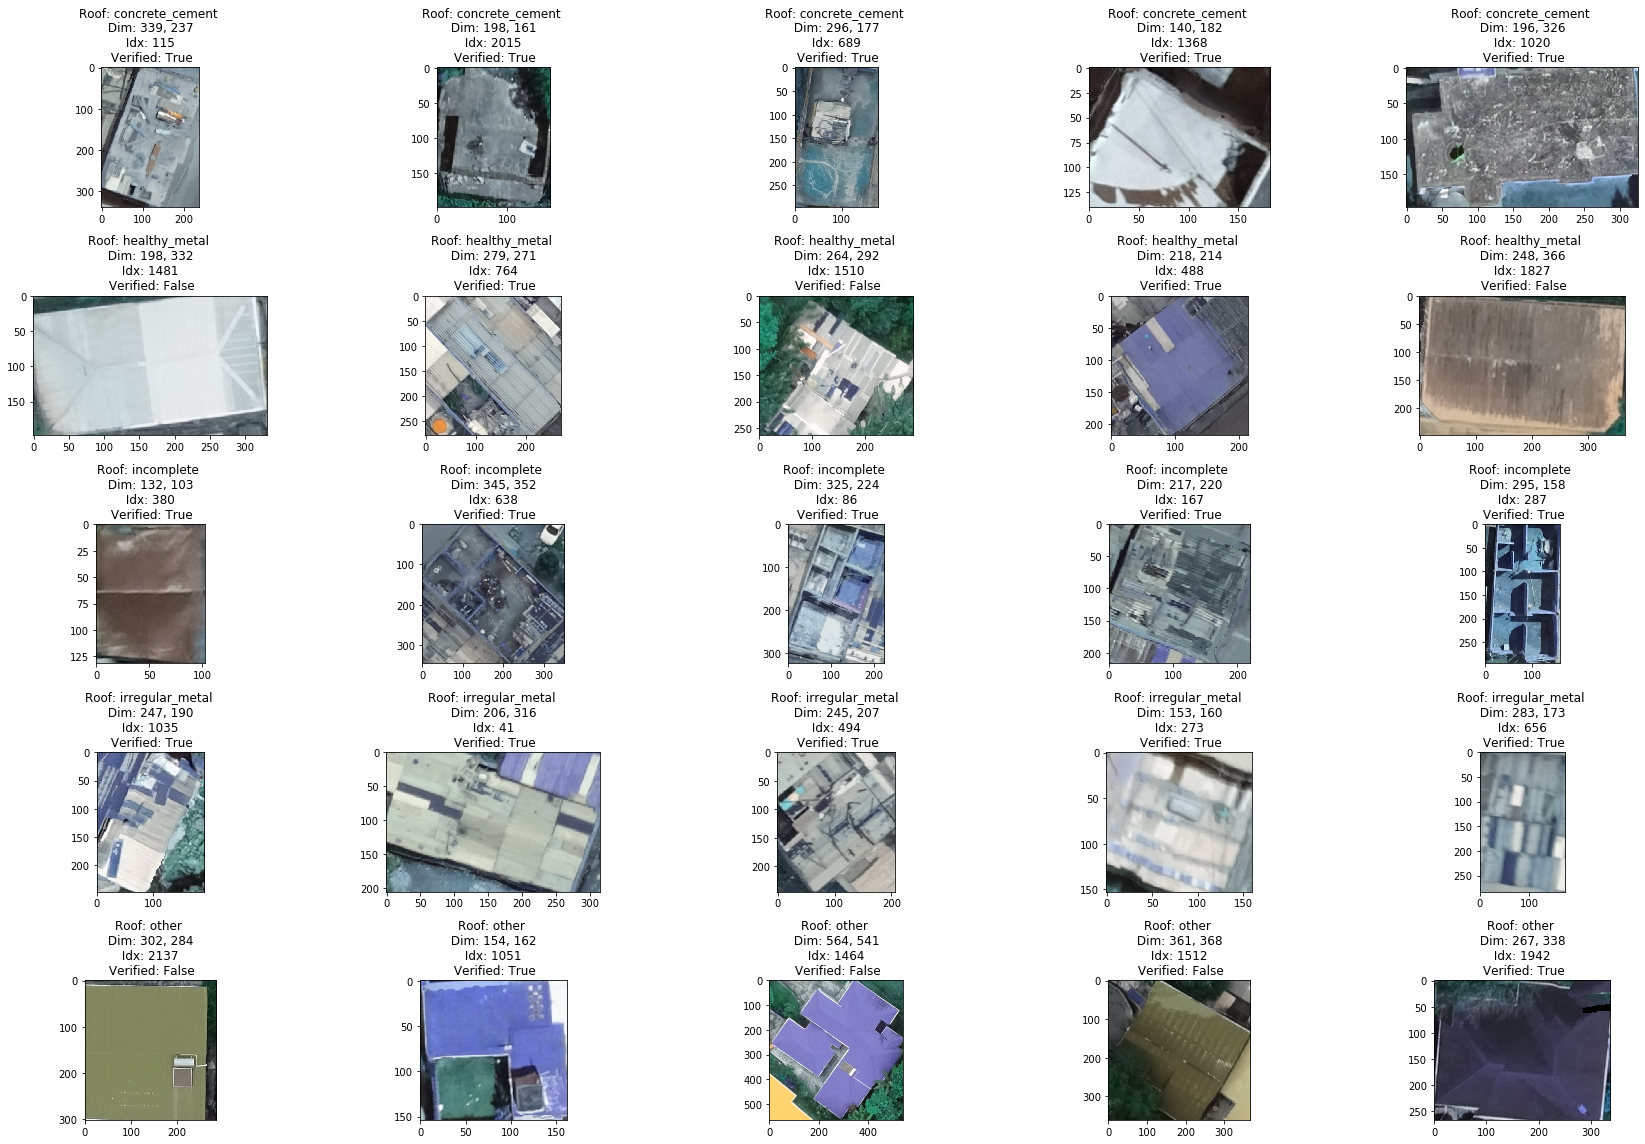

In [756]:
for _ in range(2):
    grid_img_plot(data = validation_imgs, labels = val_roof_labels, class_n = 5)

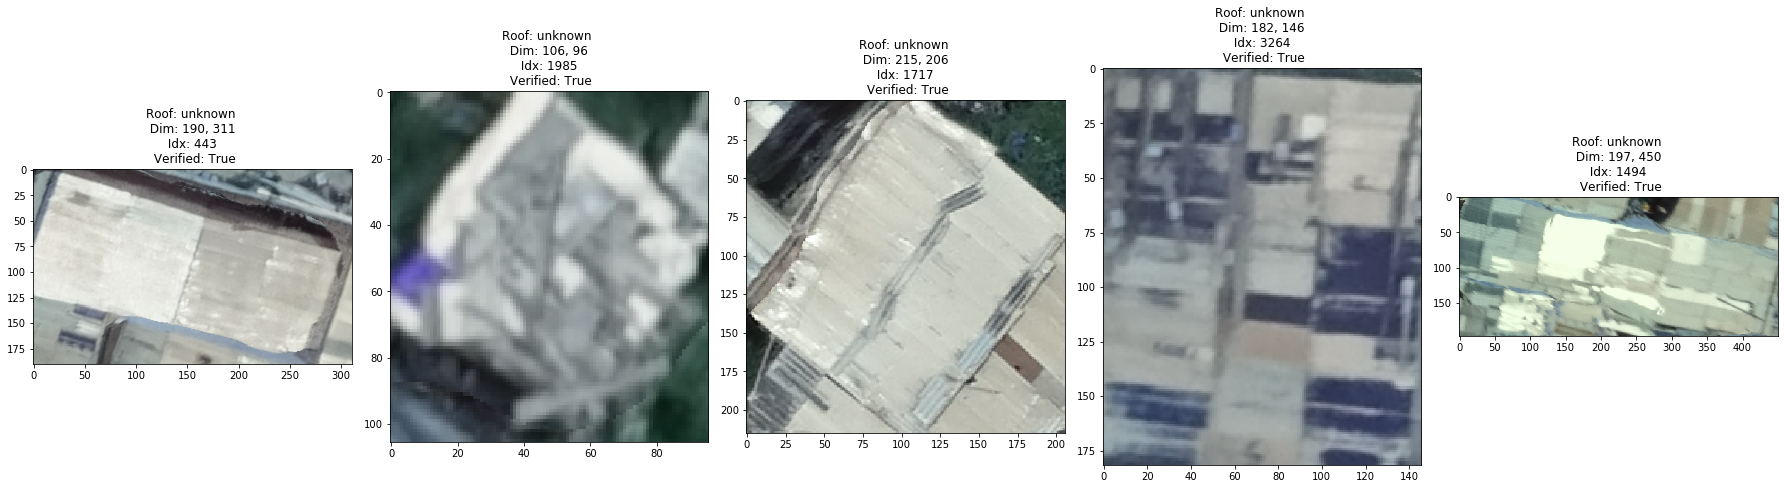

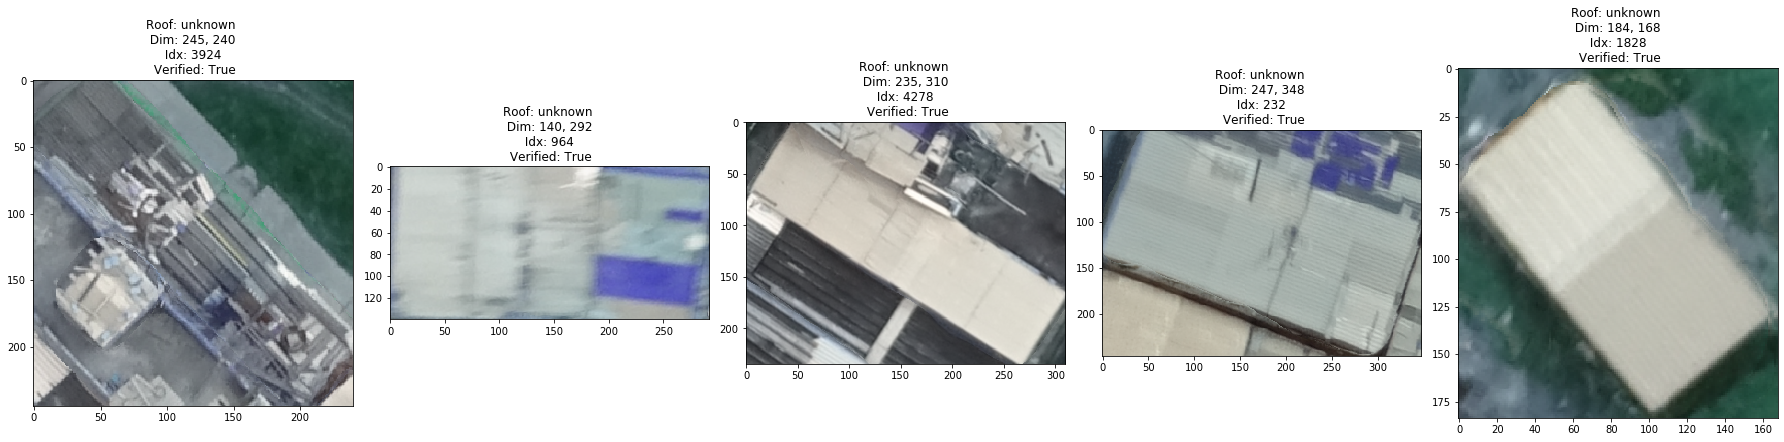

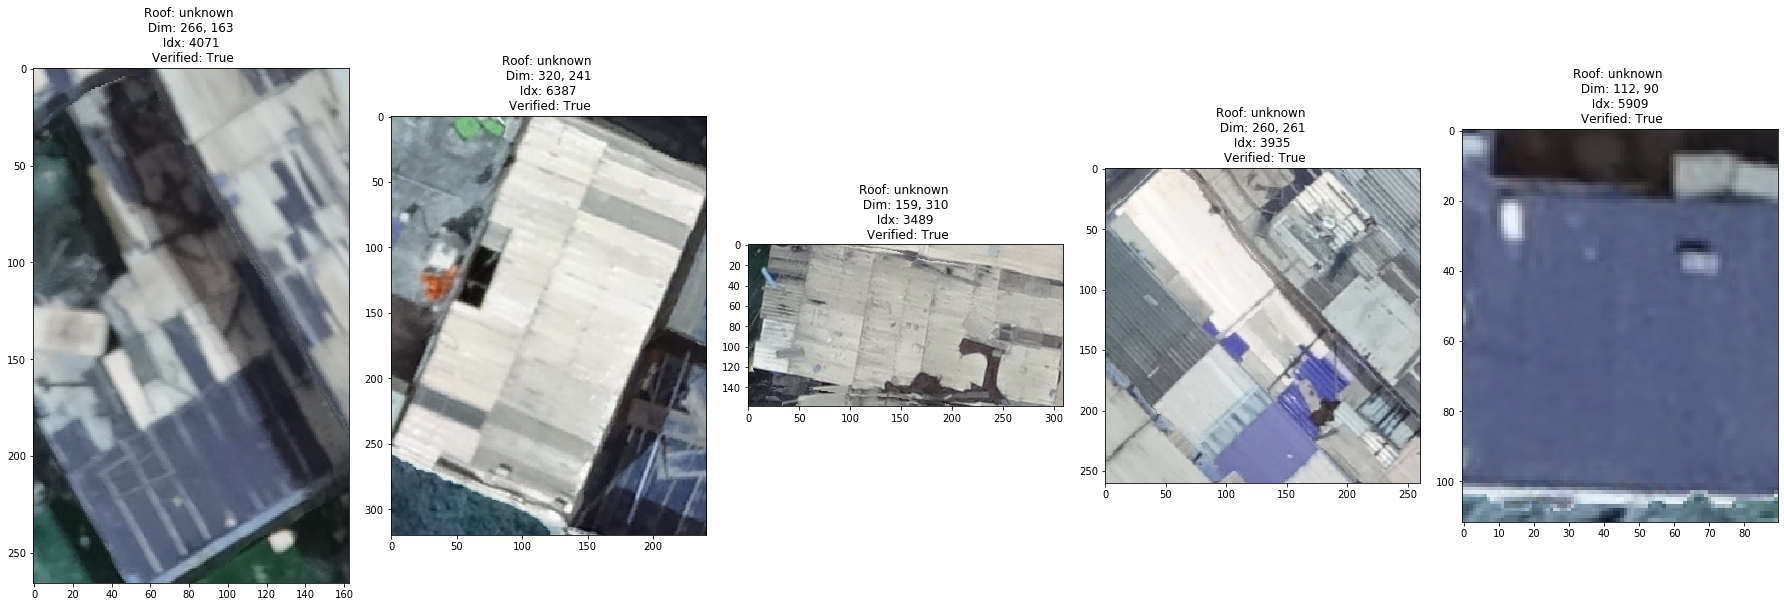

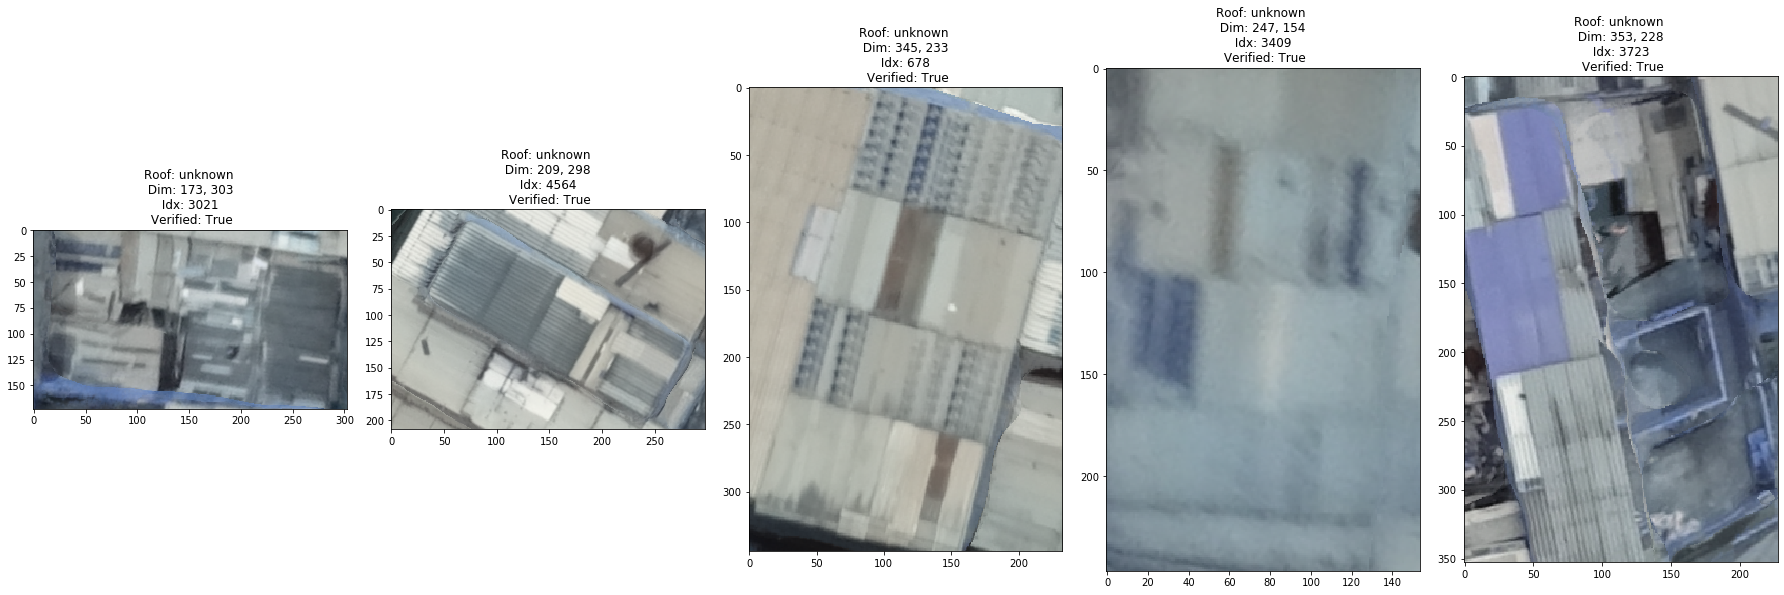

In [754]:
for _ in range(5):
    grid_img_plot(data = test_imgs, labels = test_roof_labels, class_n = 5)

## T-Distributed Stochastic Neighbour Entities (t-SNE)

In [620]:
random_idx = train_labels.id.sample(frac = 0.1, replace = False, random_state = 1017)
tsne_set = train_labels[train_labels.id.isin(random_idx)]
tsne_labels = train_roof_labels[random_idx.index]
tsne_set.reset_index(inplace = True, drop = True)

for object in [tsne_set, tsne_labels]:
    print("Object length:", len(object))

Object length: 2030
Object length: 2030


In [627]:
tsne_imgs = [cv2.imread(tsne_set.id[i]) for i in range(len(tsne_set))]
tsne_imgs = [cv2.resize(tsne_imgs[i],(150, 150)) for i in range(len(tsne_set))]
tsne_img_arrays = [tsne_imgs[i].reshape(1, -1) for i in range(len(tsne_set))]
tsne_img_df = pd.DataFrame(np.concatenate(tsne_img_arrays))

tsne_img_df.head()

0      1      2      3      4      5      6      7      8      9      ...  \
0    191    194    197    196    198    198    201    202    202    211  ...   
1    206    210    200    205    211    201    203    210    201    204  ...   
2    102    140    144    105    142    147    114    150    155    121  ...   
3    148    159    161    152    163    165    153    164    165    161  ...   
4     39     80     64     39     79     63     40     80     64     40  ...   

   67490  67491  67492  67493  67494  67495  67496  67497  67498  67499  
0    141    104    145    143    124    164    162    134    171    171  
1    138     97    128    146    116    147    164    121    151    170  
2    151    117    140    151    116    139    151    111    133    145  
3    202    193    205    203    192    204    202    190    204    201  
4    205    199    208    203    196    205    200    195    204    200  

[5 rows x 67500 columns]

In [628]:
start = time.time()

roof_type_tsne = TSNE(random_state = 1017, n_components = 2, verbose = 1, n_iter = 300)
tsne_components = roof_type_tsne.fit_transform(tsne_img_df)

mins_elapsed =  round((time.time() - start) / 60, 2)

print("t-SNE routine finished- elapsed time: {} minutes".format(mins_elapsed))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2030 samples in 7.300s...
[t-SNE] Computed neighbors for 2030 samples in 617.919s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2030
[t-SNE] Computed conditional probabilities for sample 2000 / 2030
[t-SNE] Computed conditional probabilities for sample 2030 / 2030
[t-SNE] Mean sigma: 3128.593294
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.559143
[t-SNE] KL divergence after 300 iterations: 2.695032
t-SNE routine finished- elapsed time: 10.63 minutes


In [654]:
tsne_results = pd.DataFrame({
    "tsne_1": tsne_components[:, 0],
    "tsne_2": tsne_components[:, 1],
    "roof_type": tsne_labels,
})

tsne_results = tsne_results[tsne_results.tsne_1 < 20]
tsne_results.head()

tsne_1    tsne_2      roof_type
10412 -7.798151 -8.957158  healthy_metal
15249 -3.063078  6.768411  healthy_metal
15417 -0.683537 -9.796128  healthy_metal
3670  -6.716567 -8.710645  healthy_metal
1074  -4.277925 -7.017640  healthy_metal

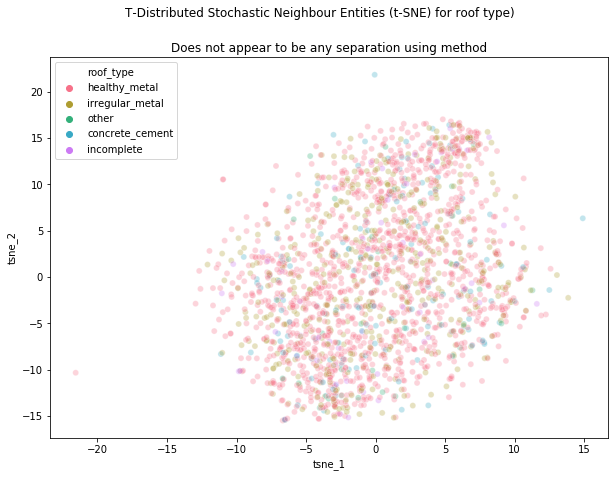

In [684]:
plt.figure(figsize = (10, 7))

sns.scatterplot(
    x = "tsne_1", 
    y = "tsne_2",
    hue = "roof_type",
    palette = sns.color_palette("husl", 5),
    data = tsne_results,
    legend = "full",
    alpha = 0.3
)
plt.suptitle("T-Distributed Stochastic Neighbour Entities (t-SNE) for roof type)")
plt.title("Does not appear to be any separation using method");